In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
os.chdir("../")
from seq_queries.utils import read_pkl, write_pkl

# Search - Sampling Alignment

In [5]:
samples = [100,1000,10000,100000]
paths = ["data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_1000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_10000s_128m.pkl",
         "data/importance_sampling/shakespeare/mc_importance_estimate_a_rt_thou_10-20?_100000s_128m.pkl"]
beam_search = "data/beam_search/shakespeare/beam_search_lb_a_rt_thou?_10seq_<a>_55.pkl"

In [12]:
lower_bound = read_pkl(beam_search)
for p in paths:
    data = read_pkl(p)
    print(len(data))

55
55
55
55


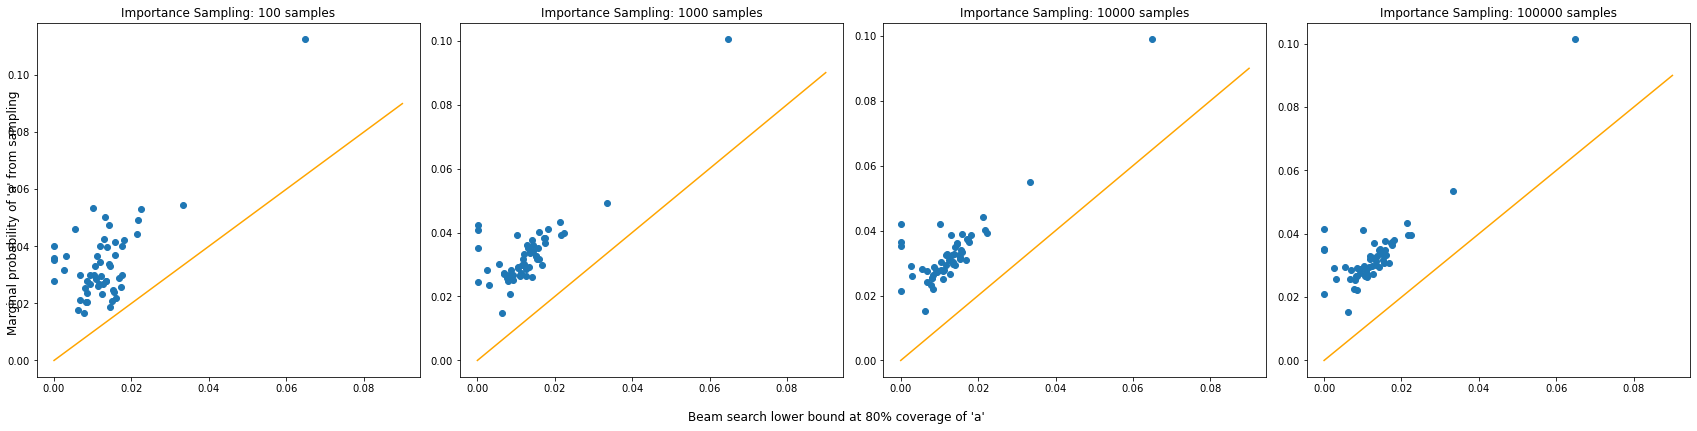

In [26]:
samples = [100,1000,10000,100000]
title = "Importance Sampling: {} samples"
fig, axs = plt.subplots(1,4, figsize = (24,6))

for i in range(len(paths)):
    data = read_pkl(paths[i])
    ref = np.arange(0,.1,0.01)
    axs[i].plot(list(ref),list(ref),linestyle="-", color = "orange")
    axs[i].scatter(lower_bound, data)
    axs[i].set_title(title.format(samples[i]))
    
fig.supxlabel("Beam search lower bound at 80% coverage of 'a'")
fig.supylabel("Marginal probability of 'a' from sampling")
plt.tight_layout()

## Ground Truth Exploration

In [4]:
data = read_pkl("data/ground_truth/shakespeare/val-dl_gt_18h_20s_exc-dynamic.pkl")

(array([178., 175., 174., 152., 154., 131., 111.,  96.,  81.,  65.,  66.,
         76.,  57.,  42.,  44.,  46.,  28.,  30.,  24.,  35.,  27.,  20.,
         15.,  22.,  13.,  14.,  12.,  11.,  11.,  13.,   8.,  11.,   9.,
          9.,   8.,  10.,  10.,  10.,   5.,   1.,   8.,   8.,   5.,   8.,
          4.,   4.,   4.,   7.,   2.,  11.,   5.,   8.,   8.,   3.,   5.,
          8.,   4.,   5.,   3.,   5.,   1.,   5.,   7.,   2.,   6.,   2.,
          3.,   3.,   2.,   5.,   2.,   4.,   3.,   2.,   1.,   2.,   3.,
          7.,   3.,   3.,   4.,   5.,   1.,   3.,   1.,   3.,   5.,   5.,
          0.,   5.,   4.,   4.,   3.,   2.,   3.,   2.,   6.,   7.,  16.,
         23.]),
 array([9.7172733e-06, 1.0007591e-02, 2.0005465e-02, 3.0003339e-02,
        4.0001214e-02, 4.9999088e-02, 5.9996959e-02, 6.9994837e-02,
        7.9992712e-02, 8.9990579e-02, 9.9988453e-02, 1.0998633e-01,
        1.1998420e-01, 1.2998208e-01, 1.3997996e-01, 1.4997782e-01,
        1.5997569e-01, 1.6997357e-01, 1.799714

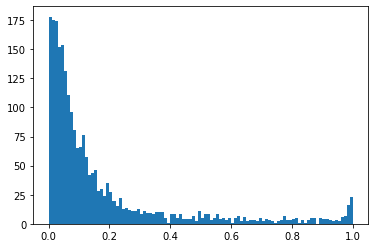

In [11]:
plt.hist(data,bins = 100)

In [19]:
data = read_pkl("data/ground_truth/shakespeare/val-dl_gt_18h_20s_exc-dynamic.pkl")

In [16]:
data = read_pkl("data/importance_sampling/shakespeare/val-dl_gt_18h_20s_exc-dynamic.pkl")

In [17]:
data.shape

(2287, 100000)

In [18]:
impsamp = data.mean(axis=1)

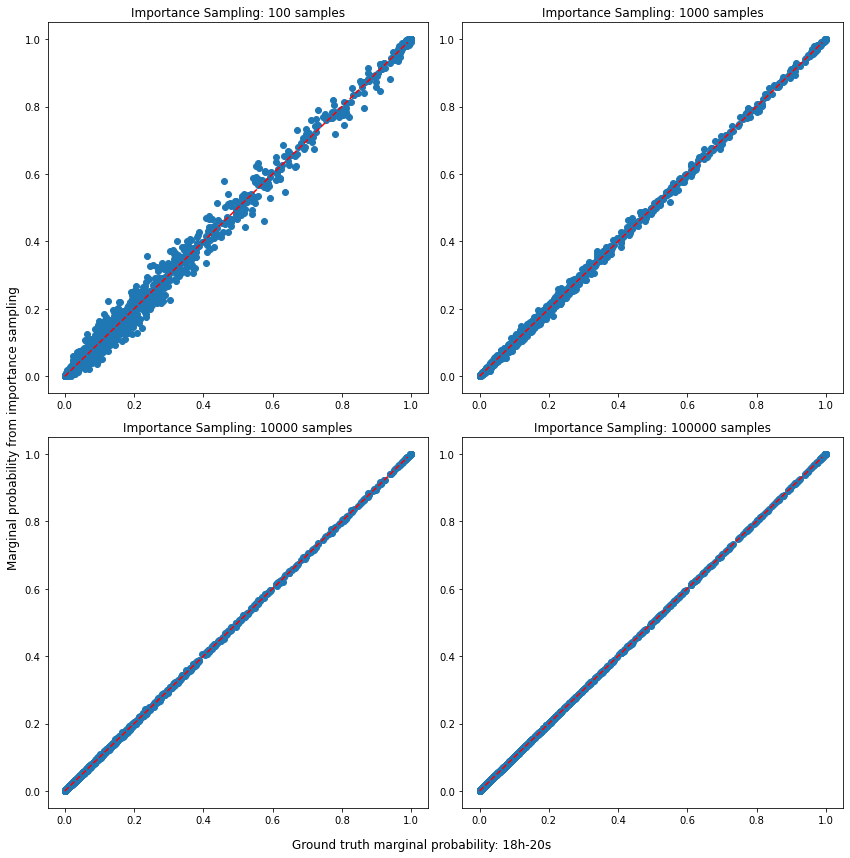

In [32]:
samples = [100,1000,10000,100000]
title = "Importance Sampling: {} samples"
fig, axs = plt.subplots(2,2, figsize = (12,12))
gt_data = read_pkl("data/ground_truth/shakespeare/val-dl_gt_18h_20s_exc-dynamic.pkl")
samp_data = read_pkl("data/importance_sampling/shakespeare/val-dl_gt_18h_20s_exc-dynamic.pkl")

for i in range(len(samples)):
    # data = read_pkl(paths[i])
    ref = np.arange(0,1,0.01)
    axs[i//2][i%2].scatter(gt_data, samp_data[:,:samples[i]].mean(axis = -1))
    axs[i//2][i%2].set_title(title.format(samples[i]))
    axs[i//2][i%2].plot(list(ref),list(ref),linestyle="dashed", color = "red")
    
fig.supxlabel("Ground truth marginal probability: 18h-20s")
fig.supylabel("Marginal probability from importance sampling")
plt.tight_layout()